# TOREAD
https://www.v7labs.com/blog/medical-image-annotation-guide
https://www.v7labs.com/blog/image-segmentation-guide
https://github.com/cgohlke/lfdfiles/blob/master/lfdfiles/lfdfiles.py#L177

https://www.youtube.com/watch?v=QEz4bG9P3Qs&ab_channel=DigitalSreeni
https://www.youtube.com/watch?v=PRceoMWcv1U&ab_channel=DigitalSreeni

Resource for lfdfiles  
https://github.com/cgohlke/lfdfiles/blob/master/lfdfiles/lfdfiles.py#L177  

Dataset:
https://alleninstitute.org/bigneuron/data/

In [1]:
filepath = './first2000/first2000/Extracted/00001.FruMARCM-M002262_seg001.lsm.tif.c3.v3draw.uint8.v3draw/00001.FruMARCM-M002262_seg001.lsm.tif.c3.v3draw.uint8.v3draw'

Using Lfdfiles.  
This is a python library and console script used to read proprietary files formats used to store experimental data and metadata  

read, write, convert, and view many of the proprietary file formats used to store experimental data and metadata at the Laboratory for Fluorescence Dynamics: SimFCS VPL, VPP, JRN, BIN, INT, CYL REF, BH, BHZ FBF, FBD, B64, I64, Z64, and R64; GLOBALS LIF and ASCII; CCP4 MAP; Vaa3D RAW; Bio-Rad(r) PIC; Vista IFLI and IFI; FlimFast FLIF.

[LFD Computing](https://www.lfd.uci.edu/~gohlke/) resources for capturing images with some very interesting application such as measuring the molecular mass of objects [LFD SITE](https://www.lfd.uci.edu/)

In [2]:
import lfdfiles

ModuleNotFoundError: No module named 'lfdfiles'

In [ ]:
# lfdfiles.Vaa3dRaw()

In [3]:
f1 = LfdFile()

NameError: name 'LfdFile' is not defined

In [4]:
from lfdfiles import Vaa3dRaw

ModuleNotFoundError: No module named 'lfdfiles'

In [5]:
newname = './data/00001.FruMARCM-M002262_seg001.lsm.tif.c3.v3draw.uint8.tif'
data = []

In [6]:
with Vaa3dRaw(filepath) as f:
    f.shape
    data = f.asarray()
    f.totiff(newname, compression='zlib')

NameError: name 'Vaa3dRaw' is not defined

In [7]:
data.shape

AttributeError: 'list' object has no attribute 'shape'

This image has 4 dimensions, (?, time, y, x) -> i assume the one is grayscale


Convert the PIC file to a compressed TIFF file:
>>> with BioradPic('_biorad.pic') as f:
...     f.totiff('_biorad.tif', compression='zlib')

In [8]:
from skimage import io

In [9]:
fly_neuron = io.imread('./data/00001.FruMARCM-M002262_seg001.lsm.tif.c3.v3draw.uint8.tif')

In [10]:
fly_neuron.shape

(1, 119, 1024, 1024)

C:\Users\shuss\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


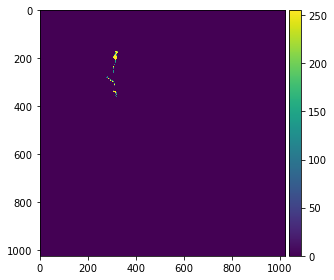

In [11]:
io.imshow(fly_neuron[0][11])

In [12]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np

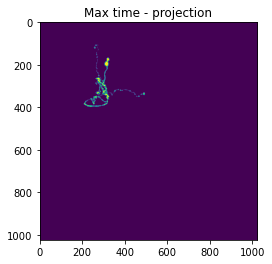

In [14]:
max_time = np.max(fly_neuron[0], axis=0)
plt.imshow(max_time)
plt.title('Max time - projection')
plt.show()

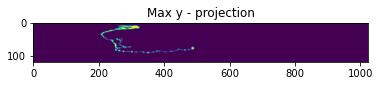

In [15]:
max_y = np.max(fly_neuron[0], axis=1)
plt.imshow(max_y)
plt.title('Max y - projection')
plt.show()

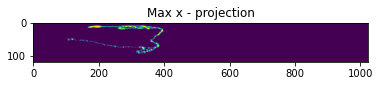

In [16]:
max_x = np.max(fly_neuron[0], axis=2)
plt.imshow(max_x)
plt.title('Max x - projection')
plt.show()

In [17]:
voxel_x = 0.52
voxel_y = 0.52
voxel_t = 2

aspect_xt = voxel_t / voxel_x
aspect_yt = voxel_t / voxel_y

In [18]:
def showXYTimeprojection(image):
    max_z = np.max(image, axis=0)
    plt.imshow(max_time)
    plt.title('max projection along time axis')
    plt.show()

    max_y = np.max(image, axis=1)
    plt.imshow(max_y, aspect=aspect_xt)
    plt.title('max projection along y')
    plt.show()

    max_x = np.max(image, axis=2)
    plt.imshow(max_x, aspect=aspect_yt)
    plt.title('max projection along x')
    plt.show()

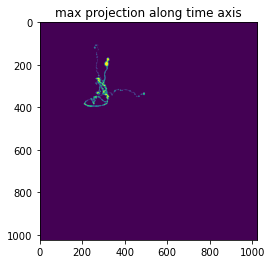

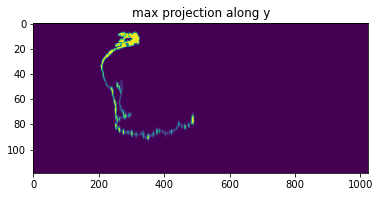

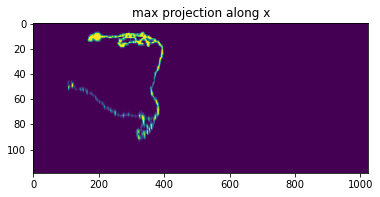

In [19]:
showXYTimeprojection(fly_neuron[0])

In [20]:
import itk

In [21]:
from itkwidgets import view

In [23]:
# convert our image into a proper itk_image
itk_image = itk.image_view_from_array(fly_neuron[0])
itk_image.SetSpacing([voxel_x, voxel_y, voxel_t])

view(itk_image) 

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…

# convert the Tiff Stack to an stl file

http://talesofa3dprinter.blogspot.com/2014/02/converting-tiff-data-to-stl-file.html


1. open the TIF Stack in Fiji
2. create a binary from the tiff stack by going to PROCESS >> BINARY >> MAKE BINARY
3. If your model has holes in it that you want to fill, you can.
    a. go to PROCESS >> BINARY >> FILL HOLES 
    b. repeat step 3 if there are still more holes 
4. You can make the file smaller if needed. keep in mind this will decrease the accuracy of the model in comparison to the object it was made from. but this will make it more likely that your print will succeed. 
5. if their are stray pixels, go to 
    a. PROCESS >> BINARY >> ERODE 
    b. repeat until stray pixels are removed
    
I was able to generate an stl and open it in CURA. However this file cannot be printed, as it is non continuous and sperated 
in many places. Also, it is a large file and takes about 4-5 minutes to load

FOUND RESOURCES ABOUT THE DATASET    
look at section titled, the first 2000 fruitfly image stacks used for algorithm porting/development  
https://github.com/BigNeuron/Data/releases/tag/data_v1.0_first2000


Preprocessing steps to prepare image data for neuron tracing  
https://github.com/BigNeuron/BigNeuron-Wiki/wiki/Image-Preprocessing

# Using this generate gabor filters for the 3d model

What are Gabor Features and how do we use them